## Evaluation of the progress towards SDG goal (No.7 )


In [1]:
# Importing the necessary libraries
%run helper.py

In [ ]:
# Data Preparation
df = pd.read_csv("Dataset/share-electricity-renewables.csv")

### Visualization of the share of electricity production from renewables from different countries using Sequential colormap.

In [ ]:
# Sequential colormap

fig = go.Figure(data=go.Choropleth(
    locations = df['Code'],
    z = df['Renewables - % electricity'],
    text = df['Entity'],
    colorscale = 'Greens',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_ticksuffix = '%',
    colorbar_title = 'Share of electricity<br>from renewables',
))

fig.update_layout(
    title_text='Share of electricity production from renewables, 2022',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://ourworldindata.org/grapher/share-electricity-renewables?tab=table">\
            Our World in Data</a>',
        showarrow = False
    )]
)
pio.renderers.default = 'browser'
fig.show()


### Visualization of the share of electricity production from renewables from different countries using a diverging color map.

In [6]:
# Diverging color scale

global_avg = df['Renewables - % electricity'].mean()
std_dev = df["Renewables - % electricity"].std()
df["Z-Score"] = (df["Renewables - % electricity"] - global_avg) / std_dev

fig = go.Figure(data=go.Choropleth(
    locations = df['Code'],
    z = df["Z-Score"],
    zmid=0,
    text = df['Entity'],
    colorscale='RdBu',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_ticksuffix = '',
    colorbar_title = 'Standard Deviations <br> from Global_Avg',
))

fig.update_layout(
    title_text='Standard Deviations from Global_Avg: Renewable Energy Share, 2022',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://ourworldindata.org/grapher/share-electricity-renewables?tab=table">\
            Our World in Data</a>',
        showarrow = False
    )]
)
pio.renderers.default = 'browser'
fig.show()


### Visualization of the Global primary energy consumption by source using Heatmap

In [14]:
#Data Preparation for Heatmap

df_heatmap = pd.read_csv("Dataset/global-energy-substitution.csv")
df_heatmap = df_heatmap.iloc[:, :-10]

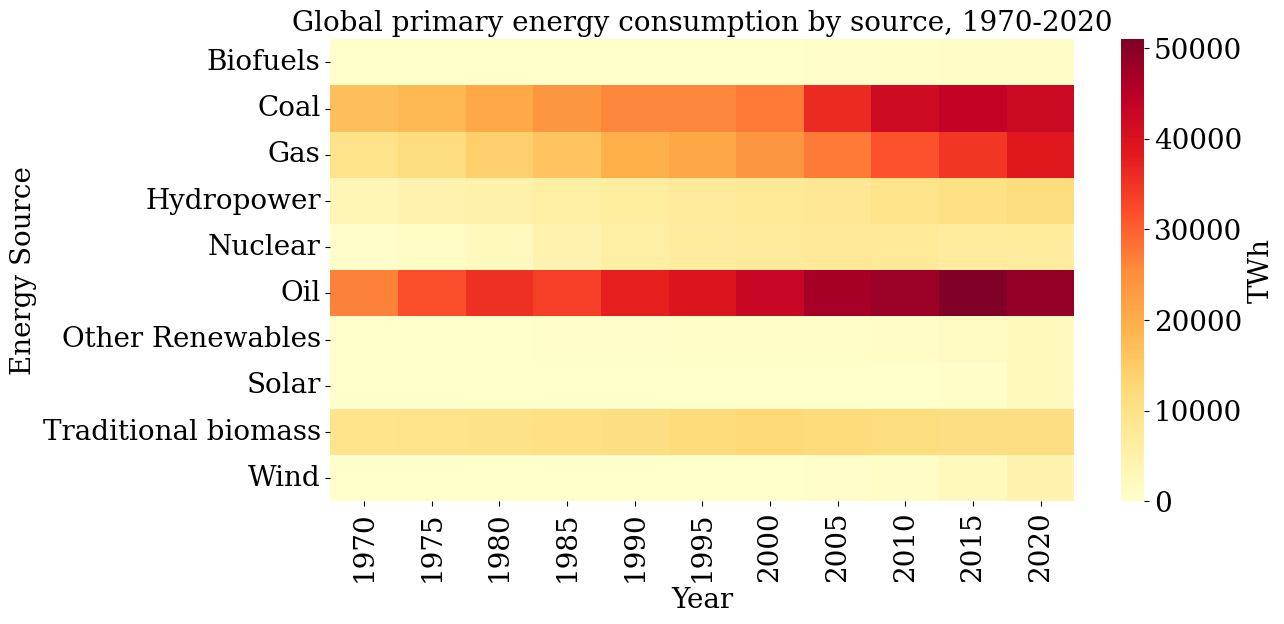

In [15]:
df_heatmap.columns = [
    'Entity', 'Code', 'Year',
    'Other Renewables', 'Biofuels', 'Solar', 'Wind', 'Hydropower', 'Nuclear', 'Gas', 'Oil', 'Coal', 'Traditional biomass'
]

df_heatmap['Year'] = df_heatmap['Year'].astype(int)
df_filtered = df_heatmap.query("1970 <= Year <= 2023")

energy_cols = ['Other Renewables', 'Biofuels', 'Solar', 'Wind', 'Hydropower', 'Nuclear', 'Gas', 'Oil', 'Coal', 'Traditional biomass']
renewable_cols = ['Other Renewables', 'Biofuels', 'Solar', 'Wind', 'Hydropower', 'Traditional biomass']

# Pivot for heatmaps
df_pivot = df_filtered.melt(id_vars=['Year'], value_vars=energy_cols, var_name='Energy Source', value_name='TWh')
df_pivot = df_pivot.pivot(index='Energy Source', columns='Year', values='TWh').fillna(0)

df_pivot = df_pivot.loc[:, df_pivot.columns % 5 == 0]

plt.figure(figsize=(12, 6))
sns.heatmap(df_pivot, cmap='YlOrRd', annot=False, fmt='.1f', cbar_kws={'label': 'TWh'})
plt.title('Global primary energy consumption by source, 1970-2020')
plt.xlabel('Year')
plt.ylabel('Energy Source')
plt.show()

### Hierarchically clustered heatmap

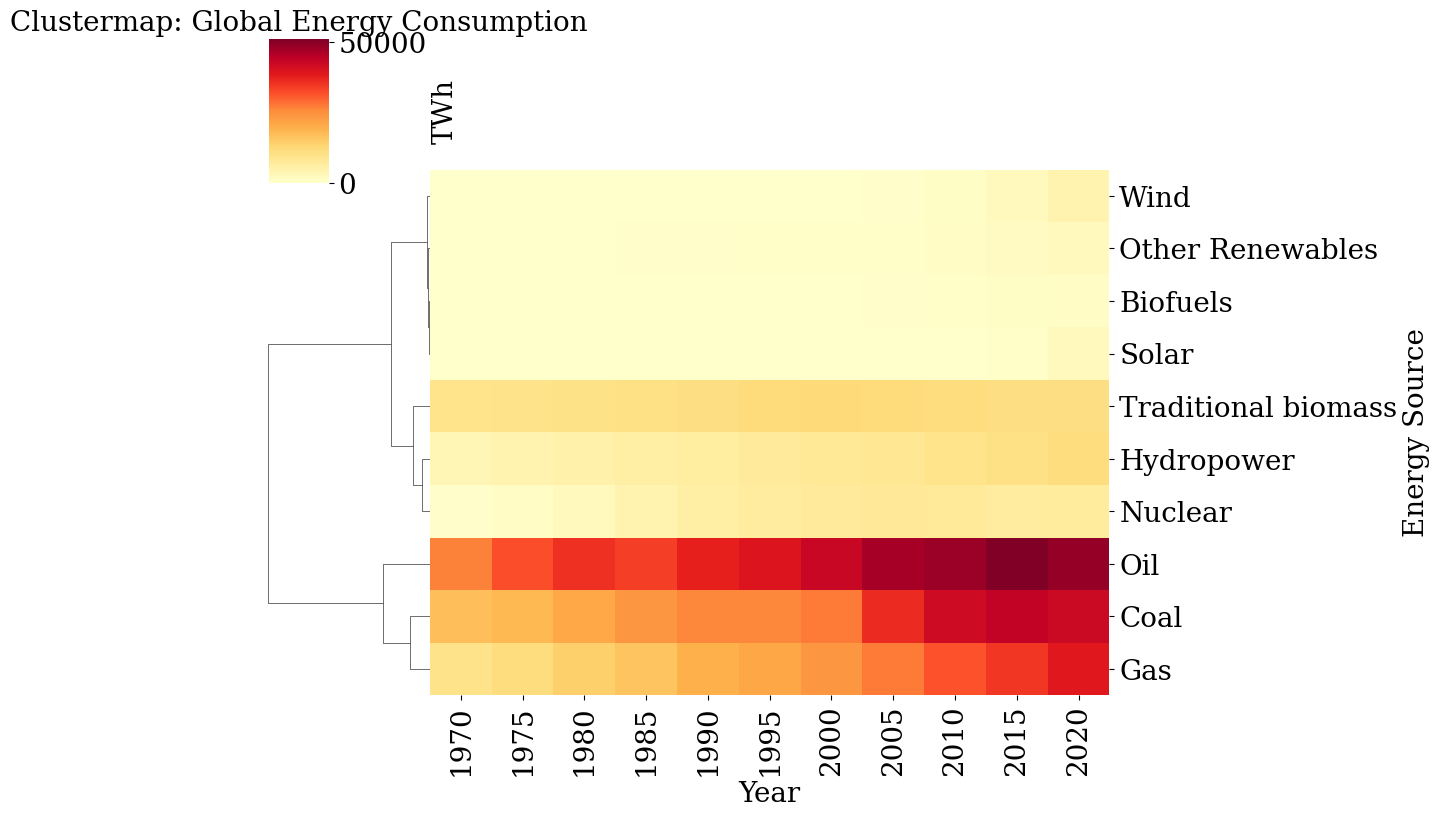

In [16]:
# Cluster Map

sns.clustermap(
    df_pivot, 
    cmap='YlOrRd',  
    figsize=(12, 8),  
    metric='euclidean',  
    method='ward', 
    cbar_kws={'label': 'TWh'},  
    row_cluster=True,  
    col_cluster=False,  
)
plt.title('Clustermap: Global Energy Consumption')
plt.show()